In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image,display
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_to_open=r'C:\Users\dell\Desktop\data sets\haberman.csv'
hab=pd.read_csv(file_to_open)

In [4]:
print(hab.shape)

(306, 4)


In [5]:
print(hab.columns)

Index(['age', 'Op_Year', 'axil_nodes', 'status'], dtype='object')


In [6]:
hab['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

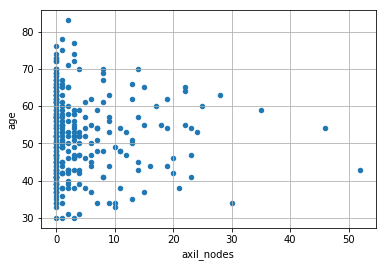

In [7]:
hab.plot(kind='scatter', x='axil_nodes', y='age') 
plt.grid()
plt.show()

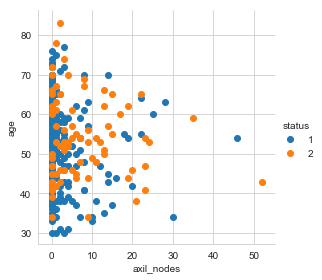

In [8]:
sns.set_style("whitegrid")
sns.FacetGrid(hab,hue='status',height=4)\
    .map(plt.scatter,'axil_nodes','age')\
    .add_legend()
plt.show()

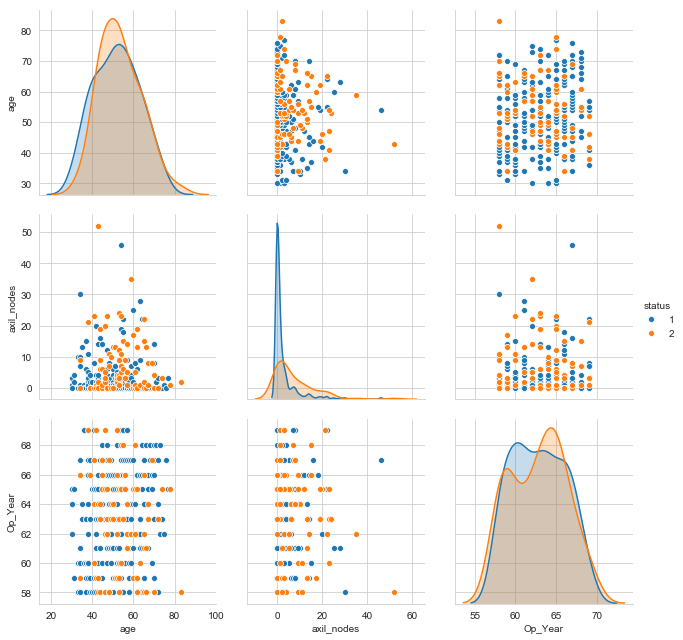

In [9]:
plt.close();
sns.set_style("whitegrid")
sns.pairplot(hab,hue="status",height=3,vars=['age','axil_nodes',"Op_Year"])
plt.show()

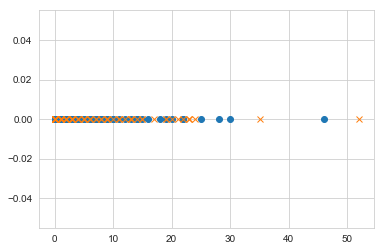

In [10]:
#hab["status"] = hab["status"].apply(lambda y: "Survived" if y == 1 else "Dead")
survived=hab.loc[hab['status'] == 1]
dead=hab.loc[hab['status'] == 2]

plt.plot(survived['axil_nodes'], np.zeros_like(survived['axil_nodes']),'o')
plt.plot(dead['axil_nodes'], np.zeros_like(dead['axil_nodes']),'x')
plt.show()

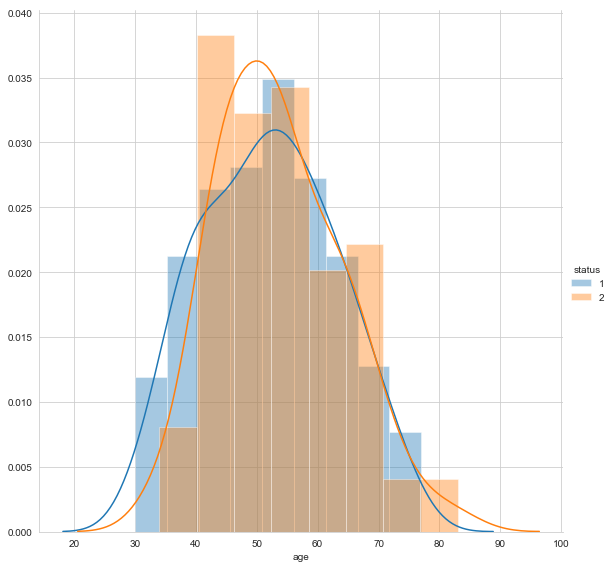

In [11]:
sns.FacetGrid(hab,hue='status',height=8)\
    .map(sns.distplot,"age")\
    .add_legend()
plt.show()


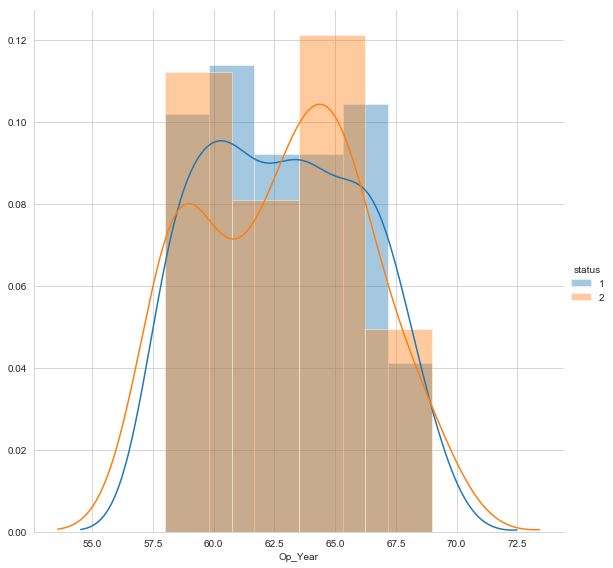

In [12]:
sns.FacetGrid(hab,hue='status',height=8)\
    .map(sns.distplot,'Op_Year')\
    .add_legend()
plt.show()

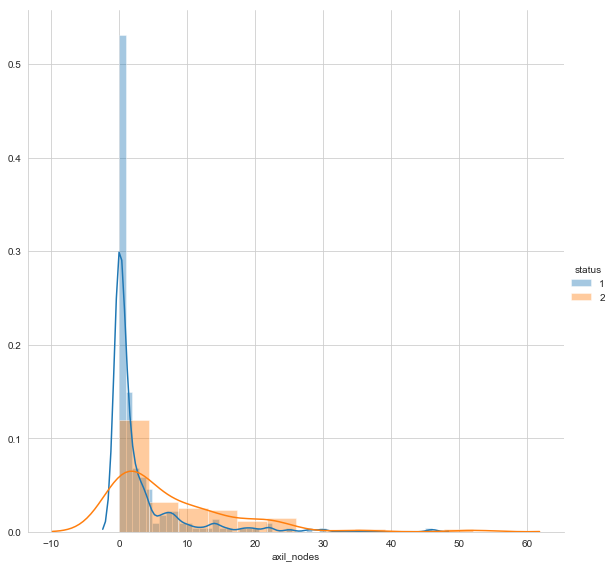

In [13]:
sns.FacetGrid(hab,hue='status',height=8)\
    .map(sns.distplot,'axil_nodes')\
    .add_legend()
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


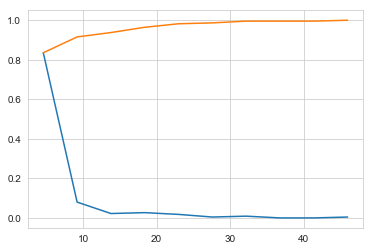

In [14]:
counts,bin_edges=np.histogram(survived['axil_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


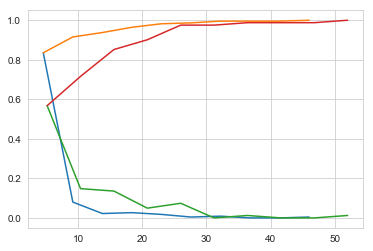

In [15]:
counts,bin_edges=np.histogram(survived['axil_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)


counts,bin_edges=np.histogram(dead['axil_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)
plt.show()


In [16]:
print(np.median(survived['axil_nodes']))
print(np.median(dead['axil_nodes']))

0.0
4.0


In [17]:
print(np.percentile(survived['axil_nodes'],np.arange(0,100,25)))
print(np.percentile(dead['axil_nodes'],np.arange(0,100,25)))

[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


In [18]:
print(np.percentile(survived['axil_nodes'],90))
print(np.percentile(dead['axil_nodes'],90))

8.0
20.0


In [19]:
from statsmodels import robust
print ('\nMedian Absolute Deviation')
print(robust.mad(survived['axil_nodes']))
print(robust.mad(dead['axil_nodes']))


Median Absolute Deviation
0.0
5.930408874022408


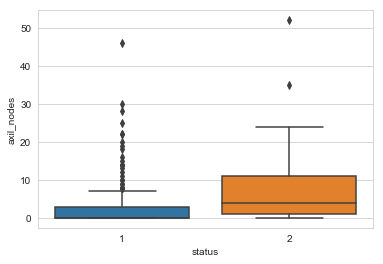

In [20]:
sns.boxplot(x='status',y='axil_nodes', data=hab)
plt.show()

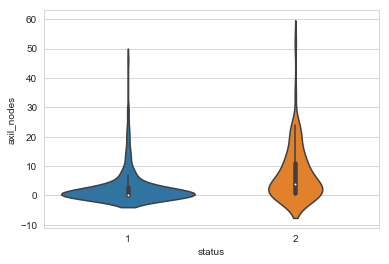

In [21]:
sns.violinplot(x='status', y='axil_nodes',data=hab)
plt.legend
plt.show()